# Sandbox

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates

from writeup_func import *

In [2]:
users1 = pd.read_csv("../data/users1.csv")
users2 = pd.read_csv("../data/users2.csv")
users3 = pd.read_csv("../data/users3.csv")

In [3]:
users = pd.concat([users1, users2, users3])
users.shape

(5241, 10)

In [4]:
tweets1 = pd.read_csv("../data/tweets1.csv", low_memory=False)
tweets2 = pd.read_csv("../data/tweets2.csv", low_memory=False)
tweets3 = pd.read_csv("../data/tweets3_1.csv", low_memory=False)
tweets4 = pd.read_csv("../data/tweets3_2.csv", low_memory=False)
tweets5 = pd.read_csv("../data/tweets3_3.csv", low_memory=False)

In [5]:
tweets = pd.concat([tweets1, tweets2, tweets3, tweets4, tweets5])
tweets.shape

(13847731, 31)

In [6]:
# to datetime
users_dt = pd.to_datetime(users.account_creation_date)
users.loc[:,'account_creation_date'] = users_dt.values
tweets.loc[:, 'tweet_time'] = pd.to_datetime(tweets.tweet_time).values

In [13]:
tweets[tweets['tweet_time'].dt.year == 2017][['userid', 'tweet_text']].tweet_text.iloc[-1]

'。，。，。郭没有任何隐私了，还能扛多久？。，。，。'

In [ ]:
tweets['tweet_language'].groupby(tweets['tweet_language']).count().plot()

In [ ]:
tweets['tweet_time'].groupby(tweets['tweet_time'].dt.hour).count().plot(kind='bar')

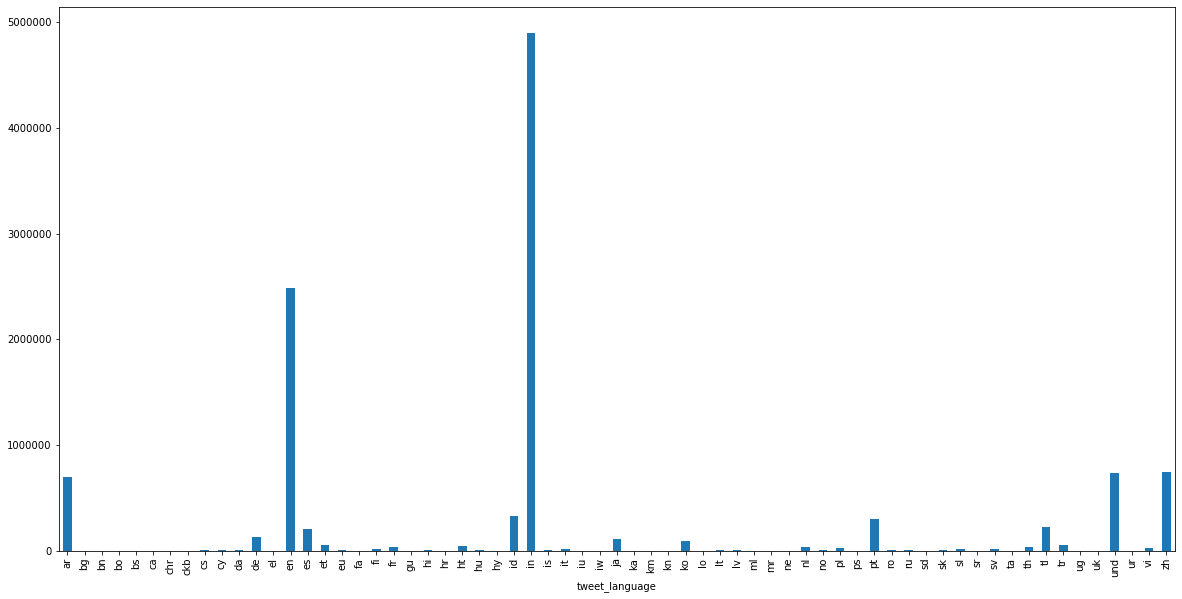

In [14]:
tweet_lang_groupby = tweets['tweet_language'].groupby(tweets['tweet_language']).count()
tweet_lang_groupby.plot(kind='bar', figsize=(20,10))

In [19]:
tweets['tweet_language'].groupby(tweets['tweet_language']).count().nlargest(10)

tweet_language
in     4898835
en     2483706
zh      743190
und     736252
ar      697315
id      333096
pt      302572
tl      225020
es      208176
de      130312
Name: tweet_language, dtype: int64

In [20]:
tweet_time_groupby = tweets['tweet_time'].groupby(tweets['tweet_time'].dt.hour).count()

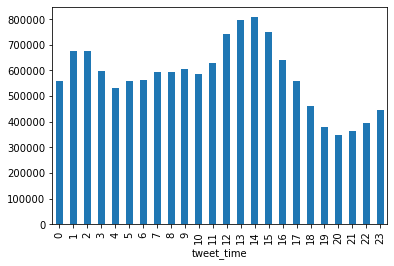

In [21]:
tweet_time_groupby.plot(kind='bar')

In [24]:
tweet_lang_groupby.sort_values(ascending=False).iloc[0]/tweet_lang_groupby.sum()

0.4281096717767735

In [28]:
tweet_lang_user = tweets[['userid','tweet_language']][tweets['tweet_language'] == 'in']['userid']

In [31]:
tweet_lang_user.groupby(tweet_lang_user).count().nlargest(10)

userid
832941887539417088    240881
1358701388            216699
769790067183190016    181132
907691540             173056
1936199119            160491
718766229700227072    148549
775462690210787329    126045
791015242448850945    116612
824772841             114218
760761981854883840    111864
Name: userid, dtype: int64

In [32]:
tweet_lang_user.nunique()

666

In [44]:
tweets[tweets['userid'] == '832941887539417088'].sort_values(by='tweet_time')[['tweet_text','tweet_time','tweet_client_name']].iloc[-200:-150]

,tweet_text,tweet_time,tweet_client_name
1321636,@RPLWORLD Pcy,2019-06-06 18:25:00,Twitter for Android
632910,@jwndral Malah gabisa wkwk,2019-06-06 18:26:00,Twitter for Android
76497,@mi8ngyu Gabisa wwkkwk,2019-06-06 18:47:00,Twitter for Android
2851466,Udah jam 2 ternyata,2019-06-06 18:47:00,Twitter for Android
1128482,@btz_kth Gabisa tidurr,2019-06-06 18:48:00,Twitter for Android
733150,@btz_kth Gamauu,2019-06-06 18:50:00,Twitter for Android
917925,@mi8ngyu Engga☹,2019-06-06 18:56:00,Twitter for Android
732787,@btz_kth Ngga☹,2019-06-06 18:56:00,Twitter for Android
918071,"@mi8ngyu Engga jugaa, semenjak sakit tidurnya ...",2019-06-06 18:59:00,Twitter for Android
918177,@mi8ngyu Tipes,2019-06-06 19:03:00,Twitter for Android


In [47]:
webclient = tweets[['tweet_client_name', 'tweet_time']][tweets['tweet_client_name'] == 'Twitter Web Client']
other = tweets[tweets['tweet_client_name'] != 'Twitter Web Client']

In [ ]:
plt.figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
plt.title("Simplified vs Traditional Tweets")
plt.plot( 'tweet_time', 'traditional', data=tweets[tweets[, marker='o', markerfacecolor='darkcyan', markersize=5, color='teal', linewidth=1)
plt.plot( 'tweet_time', 'simplified', data=dialect, marker='o', markerfacecolor='lightsteelblue', markersize=5, color='lavender', linewidth=1)
plt.legend()

In [48]:
webclient.groupby([webclient['tweet_time'].dt.month, webclient['tweet_time'].dt.year]).count()

tweetid  userid  user_display_name  user_screen_name  \
tweet_time tweet_time                                                         
1          2014           6077    6077               6077              6077   
           2015          21954   21954              21954             21954   
           2016           5694    5694               5694              5694   
           2017           6749    6749               6749              6749   
           2018           6616    6616               6616              6616   
...                        ...     ...                ...               ...   
12         2014          12630   12630              12630             12630   
           2015          11298   11298              11298             11298   
           2016           9229    9229               9229              9229   
           2017           5049    5049               5049              5049   
           2018          56883   56883              56883             56883   

                       user_reported_location  user_profile_description  \
tweet_time tweet_time                                                     
1          2014                          5953                      5864   
           2015                         20155                     21613   
           2016                          3600                      5455   
           2017                          5208                      6597   
           2018                          2932                      3684   
...                                       ...                       ...   
12         2014                          9043                     11943   
           2015                          6813                     11185   
           2016                          5632                      9148   
           2017                          2893                      3439   
           2018                         38742                     44033   

                       user_profile_url  follower_count  following_count  \
tweet_time tweet_time                                                      
1          2014                    3931            6077             6077   
           2015                    1170           21954            21954   
           2016                    1314            5694             5694   
           2017                    2229            6749             6749   
           2018                     601            6616             6616   
...                                 ...             ...              ...   
12         2014                     912           12630            12630   
           2015                    3673           11298            11298   
           2016                    3799            9229             9229   
           2017                     362            5049             5049   
           2018                    1041           56883            56883   

                       account_creation_date  ...  latitude  longitude  \
tweet_time tweet_time                         ...                        
1          2014                         6077  ...      6077       6077   
           2015                        21954  ...     21954      21954   
           2016                         5694  ...      5694       5694   
           2017                         6749  ...      6749       6749   
           2018                         6616  ...      6616       6616   
...                                      ...  ...       ...        ...   
12         2014                        12630  ...     12630      12630   
           2015                        11298  ...     11298      11298   
           2016                         9229  ...      9229       9229   
           2017                         5049  ...      5049       5049   
           2018                        56883  ...     56883      56883   

                       quote_count  reply_count  like_count  retwee